<a href="https://colab.research.google.com/github/YanisNC/AI-things/blob/master/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####This is my approach of the Titanic classification problem.

#####The best algorithm was Gradient Boosting Classifier with an **82.56%** accuracy.

# Import Libraries

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [239]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [240]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [242]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Values

### Training Set

In [244]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [245]:
df_train["Age"] = df_train["Age"].fillna(value = df_train["Age"].mean())

del df_train["Cabin"] #Too much missing values
del df_train["Ticket"] # Irrelevant
del df_train["Name"] # Irrelevant
del df_train["PassengerId"] # Irrelevant

#Drop rows with NaN values
df_train.dropna(subset = ["Embarked"], inplace=True)

In [246]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Test Set

In [247]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [248]:
df_test["Age"] = df_test["Age"].fillna(value = df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(value = df_test["Fare"].mean())

del df_test["Cabin"] #Too much missing values
del df_test["Ticket"] # Irrelevant
del df_test["Name"] # Irrelevant

In [249]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# One hot encoding

In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [251]:
#Train
df_train = pd.concat([df_train,pd.get_dummies(df_train['Sex'], prefix='Sex',dummy_na=False)],axis=1).drop(['Sex'],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['Embarked'], prefix='Embarked',dummy_na=False)],axis=1).drop(['Embarked'],axis=1)
#df_train = pd.concat([df_train,pd.get_dummies(df_train['Pclass'], prefix='Pclass',dummy_na=False)],axis=1).drop(['Pclass'],axis=1)
#df_train = pd.concat([df_train,pd.get_dummies(df_train['SibSp'], prefix='SibSp',dummy_na=False)],axis=1).drop(['SibSp'],axis=1)

#Test
df_test = pd.concat([df_test,pd.get_dummies(df_test['Sex'], prefix='Sex',dummy_na=False)],axis=1).drop(['Sex'],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Embarked'], prefix='Embarked',dummy_na=False)],axis=1).drop(['Embarked'],axis=1)
#df_test = pd.concat([df_test,pd.get_dummies(df_test['Pclass'], prefix='Pclass',dummy_na=False)],axis=1).drop(['Pclass'],axis=1)
#df_test = pd.concat([df_test,pd.get_dummies(df_test['SibSp'], prefix='SibSp',dummy_na=False)],axis=1).drop(['SibSp'],axis=1)

In [252]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [253]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


# Some plots

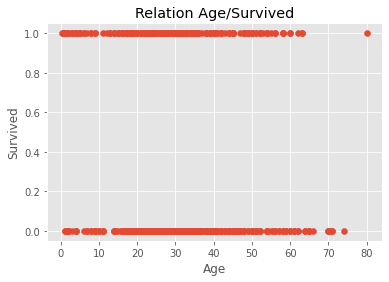

In [254]:
plt.scatter(df_train["Age"],df_train["Survived"])

plt.title("Relation Age/Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

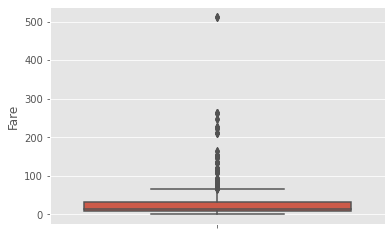

In [255]:
sns.boxplot(y = "Fare", data = df_train)

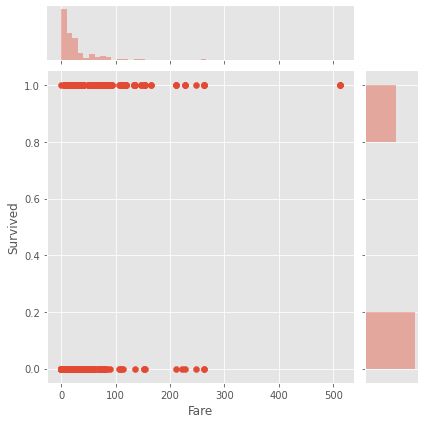

In [256]:
sns.jointplot(x="Fare", y="Survived", data=df_train)

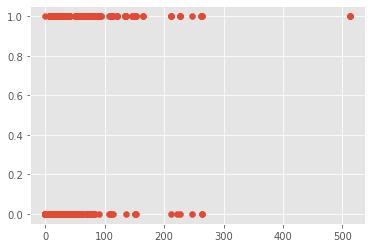

In [257]:
plt.scatter(x = df_train["Fare"], y = df_train["Survived"])

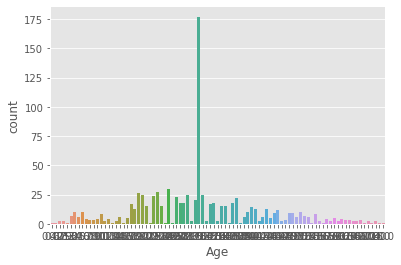

In [258]:
sns.countplot(x = "Age", data = df_train)

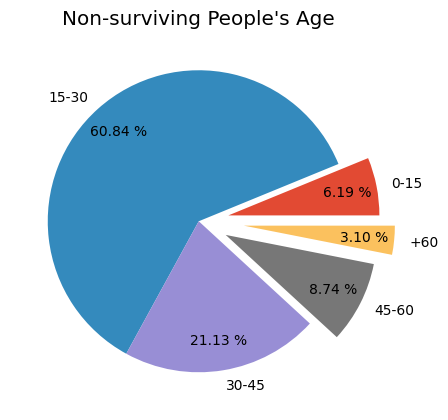

In [259]:
s_child = df_train.loc[(df_train["Age"] <= 15) & (df_train["Survived"] == 0)].count()[0]
s_30 = df_train.loc[(df_train["Age"] > 15) & (df_train["Age"] <= 30) & (df_train["Survived"] == 0)].count()[0]
s_45 = df_train.loc[(df_train["Age"] > 30) & (df_train["Age"] <= 45) & (df_train["Survived"] == 0)].count()[0]
s_60 = df_train.loc[(df_train["Age"] > 45) & (df_train["Age"] <= 60) & (df_train["Survived"] == 0)].count()[0]
s_old = df_train.loc[(df_train["Age"] > 60) & (df_train["Survived"] == 0)].count()[0]

survived_age = [s_child, s_30, s_45, s_60, s_old]
label = ['0-15', '15-30', '30-45', '45-60', '+60']
explode = [0.2,0,0,0.2,0.3]

plt.style.use('ggplot')
plt.figure(figsize=(8,5), dpi=100)

plt.pie(survived_age, explode=explode, labels=label, pctdistance=0.8, autopct='%.2f %%')
plt.title("Non-surviving People's Age")
plt.show()

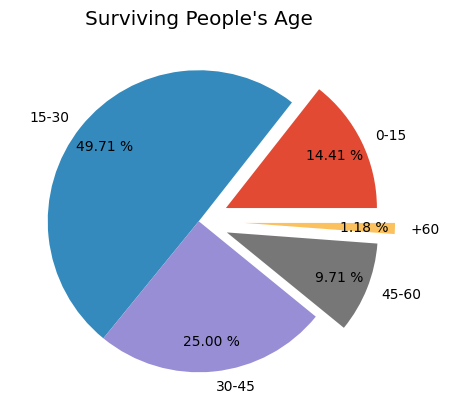

In [260]:
s_child = df_train.loc[(df_train["Age"] <= 15) & (df_train["Survived"] == 1)].count()[0]
s_30 = df_train.loc[(df_train["Age"] > 15) & (df_train["Age"] <= 30) & (df_train["Survived"] == 1)].count()[0]
s_45 = df_train.loc[(df_train["Age"] > 30) & (df_train["Age"] <= 45) & (df_train["Survived"] == 1)].count()[0]
s_60 = df_train.loc[(df_train["Age"] > 45) & (df_train["Age"] <= 60) & (df_train["Survived"] == 1)].count()[0]
s_old = df_train.loc[(df_train["Age"] > 60) & (df_train["Survived"] == 1)].count()[0]

survived_age = [s_child, s_30, s_45, s_60, s_old]
label = ['0-15', '15-30', '30-45', '45-60', '+60']
explode = [0.2,0,0,0.2,0.3]

plt.style.use('ggplot')
plt.figure(figsize=(8,5), dpi=100)

plt.pie(survived_age, explode=explode, labels=label, pctdistance=0.8, autopct='%.2f %%')
plt.title("Surviving People's Age")
plt.show()

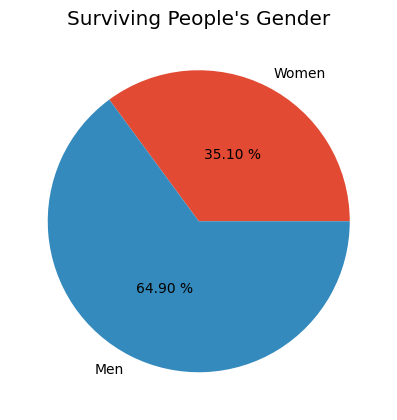

In [261]:
s_female = df_train.loc[df_train["Sex_female"] == 1].count()["Survived"]
s_male = df_train.loc[df_train["Sex_male"] == 1].count()["Survived"]

survived_age = [s_female, s_male]
label = ['Women', 'Men']

plt.style.use('ggplot')
plt.figure(figsize=(8,5), dpi=100)

plt.pie(survived_age, labels=label, pctdistance=0.5, autopct='%.2f %%')
plt.title("Surviving People's Gender")
plt.show()

# Select dependent & independent variables


In [262]:
X_train = df_train.loc[:, df_train.columns != "Survived"]
y_train = df_train["Survived"]

X_test = df_test.loc[:, df_test.columns != "PassengerId"] # I didn't remove it because we need it to submit

# Feature Scaling

In [263]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Compare Algorithms

In [264]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svl_model = LinearSVC(dual=False)
svc_model = SVC(kernel="rbf", C=0.025, probability=True)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
gbc_model = GradientBoostingClassifier()
gnb_model = GaussianNB()
xgb_model = XGBClassifier()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds

    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svl = cross_validate(svl_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    ada = cross_validate(ada_model, X, y, cv=folds, scoring=scoring)
    gbc = cross_validate(gbc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'SVM Linear Classifier':[svl['test_accuracy'].mean(),
                                                               svl['test_precision'].mean(),
                                                               svl['test_recall'].mean(),
                                                               svl['test_f1_score'].mean()],
                                        
                                      'SVM Classifier (rbf)':[svc['test_accuracy'].mean(),
                                                              svc['test_precision'].mean(),
                                                              svc['test_recall'].mean(),
                                                              svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                        
                                      'AdaBoost':[ada['test_accuracy'].mean(),
                                                  ada['test_precision'].mean(),
                                                  ada['test_recall'].mean(),
                                                  ada['test_f1_score'].mean()],
                                        
                                      'Gradient Boosting':[gbc['test_accuracy'].mean(),
                                                           gbc['test_precision'].mean(),
                                                           gbc['test_recall'].mean(),
                                                           gbc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       
                                      'XGBoost':[xgb['test_accuracy'].mean(),
                                                 xgb['test_precision'].mean(),
                                                 xgb['test_recall'].mean(),
                                                 xgb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X_train, y_train, 5)

,Logistic Regression,SVM Linear Classifier,SVM Classifier (rbf),Decision Tree,Random Forest,AdaBoost,Gradient Boosting,Gaussian Naive Bayes,XGBoost,Best Score
Accuracy,0.785190,0.787431,0.764902,0.771688,0.808805,0.798680,0.825678,0.788542,0.813318,Gradient Boosting
Precision,0.733982,0.738264,0.815030,0.703654,0.763793,0.745133,0.815864,0.727015,0.791459,Gradient Boosting
Recall,0.691176,0.688235,0.505882,0.694118,0.723529,0.723529,0.702941,0.720588,0.694118,Random Forest
F1 Score,0.710895,0.711870,0.622022,0.697862,0.742019,0.733184,0.753739,0.722786,0.738721,Gradient Boosting


# Train with Best Model

In [265]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Submission

In [266]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)